In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import glob
import matplotlib
import netCDF4
import sys
import os
# define plot dimensions
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12.,8.)

In [2]:
### axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'32', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)

In [46]:
ds = xr.open_dataset('/lcrc/group/acme/lvanroe/presentationOS/popOCN_remap_yr1959.nc',decode_times=False)

In [48]:
ds.TEMP.shape

(12, 1, 360, 720)

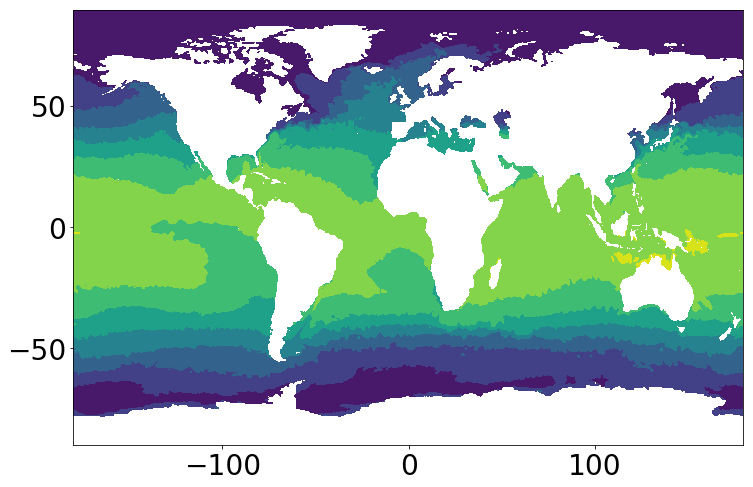

In [50]:
plt.contourf(ds.lon_bnds[:,0],ds.lat_bnds[:,0],ds.TEMP[0,0,:,:])

In [2]:
ds = xr.open_dataset('/lcrc/group/acme/lvanroe/transects/transport.nc')

In [3]:
tr = ds.Transport.values
tim = ds.Time.values
tranList = ds.TransectNames.values

In [33]:
def getPOPtransport(transect):
    direc = '/lcrc/group/acme/lvanroe/presentationOS/currentTransports/'
    f = open(direc+transect,'r')

    poptime = []
    poptransport = []
    for line in f:
        lval = line.split()
        poptime.append(float(lval[0]))
        poptransport.append(float(lval[1]))
    start=5*365
    stop=25*365
    timepop = np.asarray(poptime[start:stop])/365
    tranpop = np.asarray(poptransport[start:stop])
    return timepop,tranpop

In [31]:
obsDict = {'Drake Passage':[120,175],'Tasmania-Ant':[147,167],'Africa-Ant':None,'Antilles Inflow':[-23.1,-13.7], \
          'Mona Passage':[-3.8,-1.4],'Windward Passage':[-7.2,-6.8],'Florida-Cuba':[30,33],'Florida-Bahamas':[30,33], \
          'Indonesian Throughflow':[-21,-11],'Agulhas':[-90,-50],'Mozambique Channel':[-20,-8], \
          'Bering Strait':[0.17,1.49],'Lancaster Sound':None,'Fram Strait':None,'Robeson Channel':None}
labelDict = {'Drake Passage':'drake','Tasmania-Ant':'tasmania','Africa-Ant':'africaAnt','Antilles Inflow':'Antilles', \
          'Mona Passage':'monaPassage','Windward Passage':'windwardPassage','Florida-Cuba':'floridaCuba',\
             'Florida-Bahamas':'floridaBahamas', \
          'Indonesian Throughflow':'indonesia','Agulhas':'agulhas','Mozambique Channel':'mozambique', \
          'Bering Strait':'beringstrait','Lancaster Sound':'lancaster','Fram Strait':'fram','Robeson Channel':'robeson'}
popLookUP = {'Drake Passage':'ACC-Drake','Antilles Inflow':'Antilles_Inflow','Robeson Channel':'Robeson_Channel', \
            'Lancaster Sound':'Lancaster_Sound','Bering Strait':'Bering_Strait','Fram Strait':'Fram_Strait', \
            'Florida-Cuba':'Florida_Strait','Florida-Bahamas':'Florida_Strait','Windward Passage':'Windward_Passage',\
            'Indonesian Throughflow':'Indonesian_Throughflow','Agulhas':'Agulhas','Mozambique Channel':'Mozambique_Channel',\
            'Africa-Ant':None,'Tasmania-Ant':None,'Mona Passage':'Mona_Passage'}

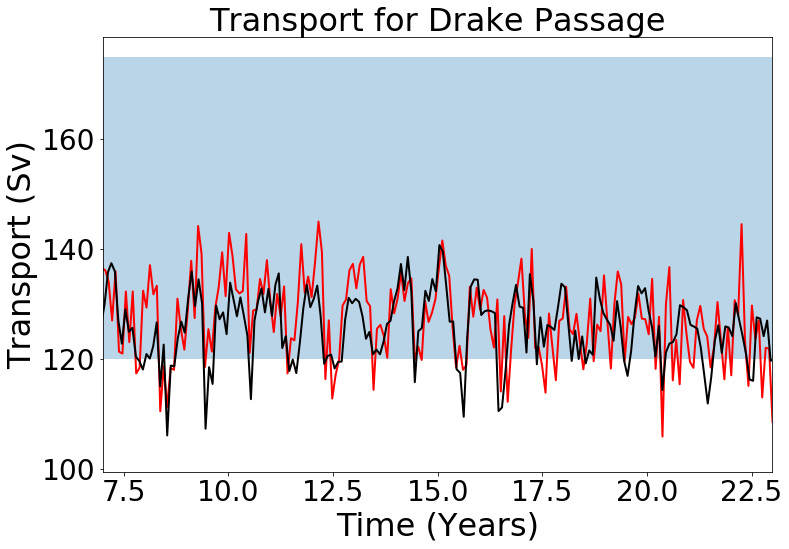

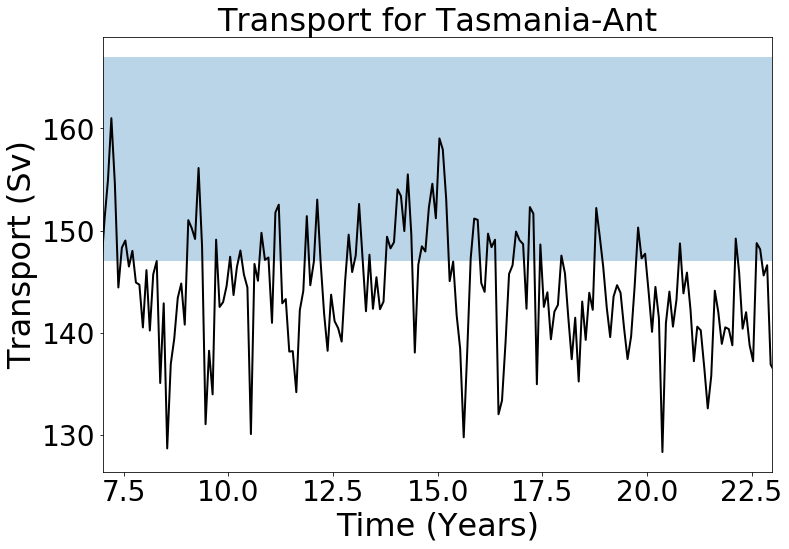

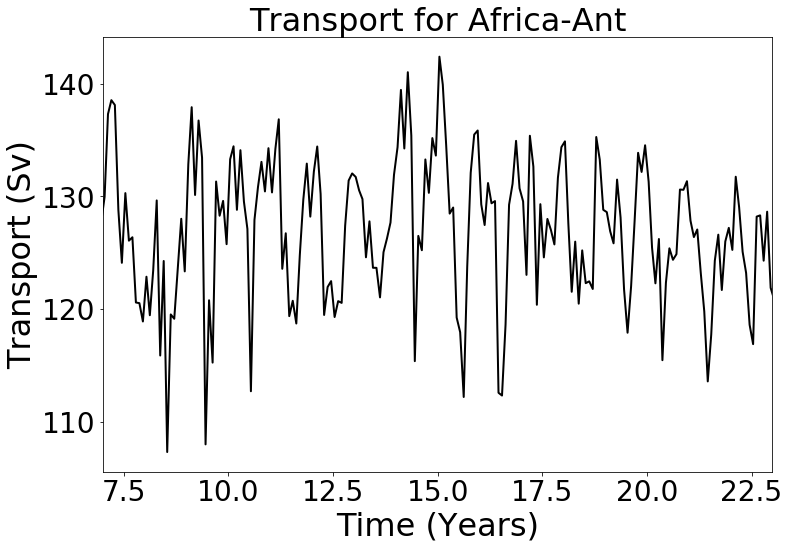

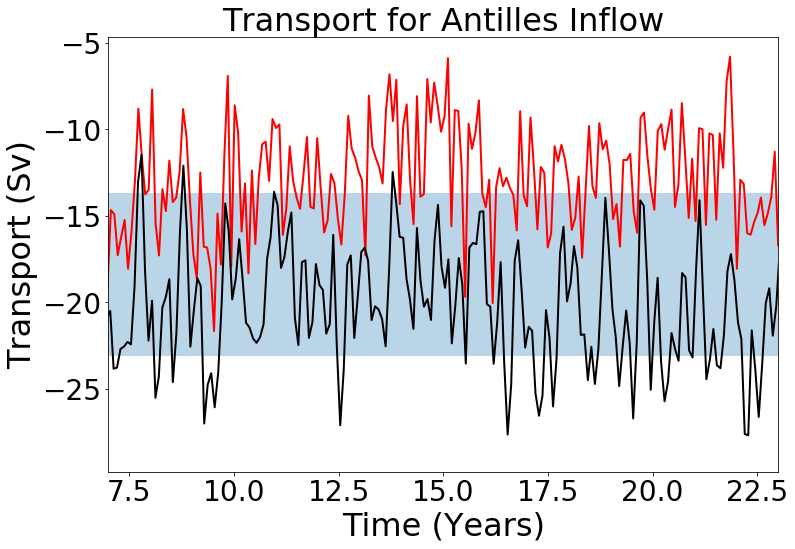

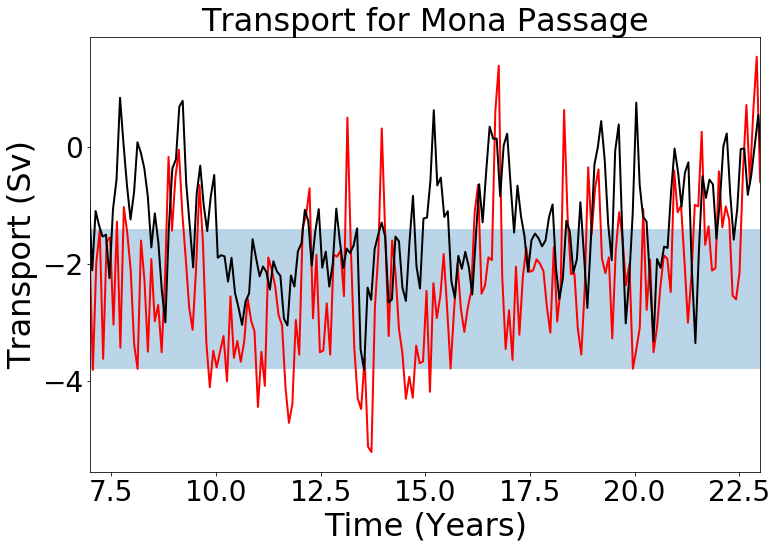

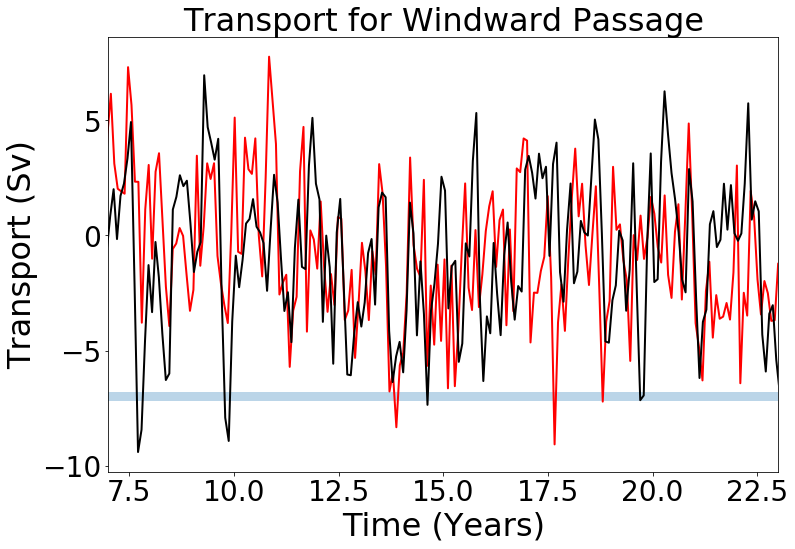

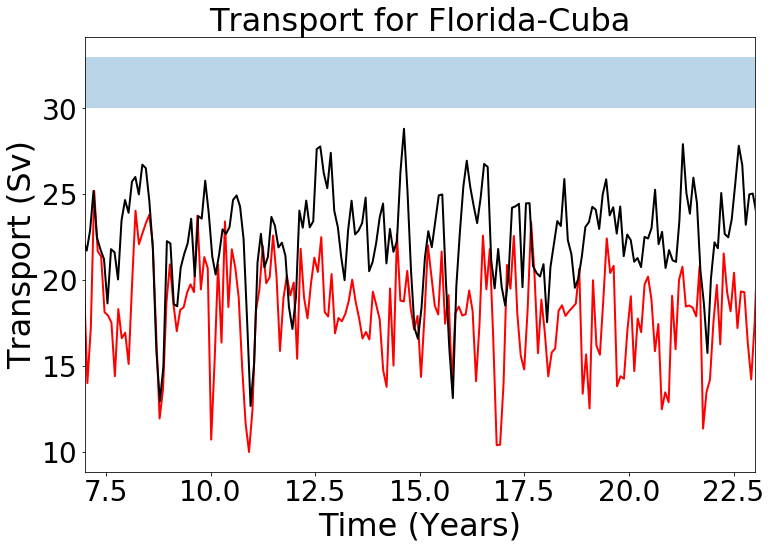

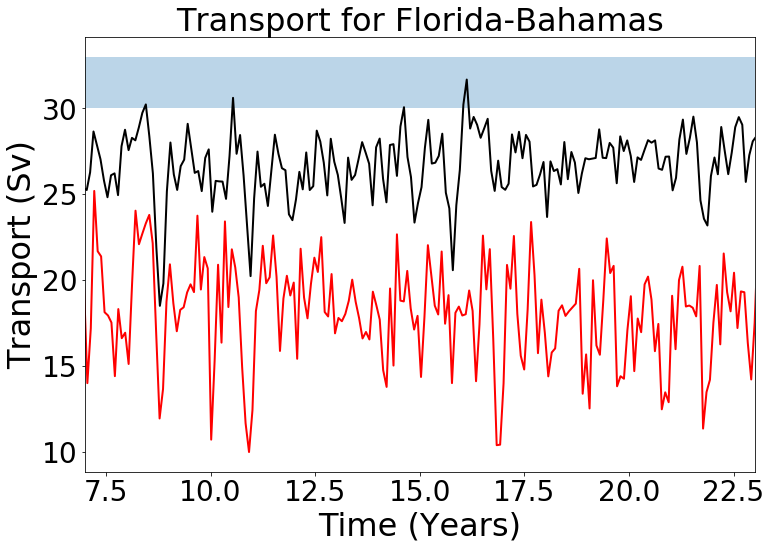

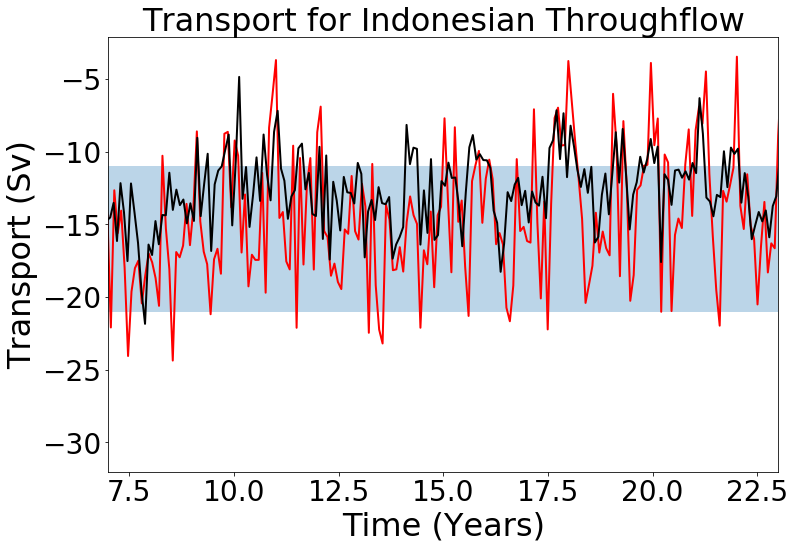

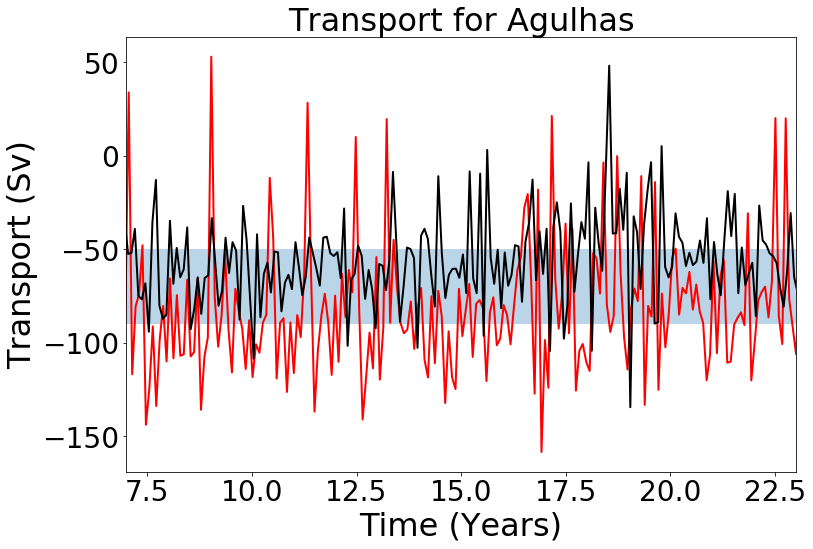

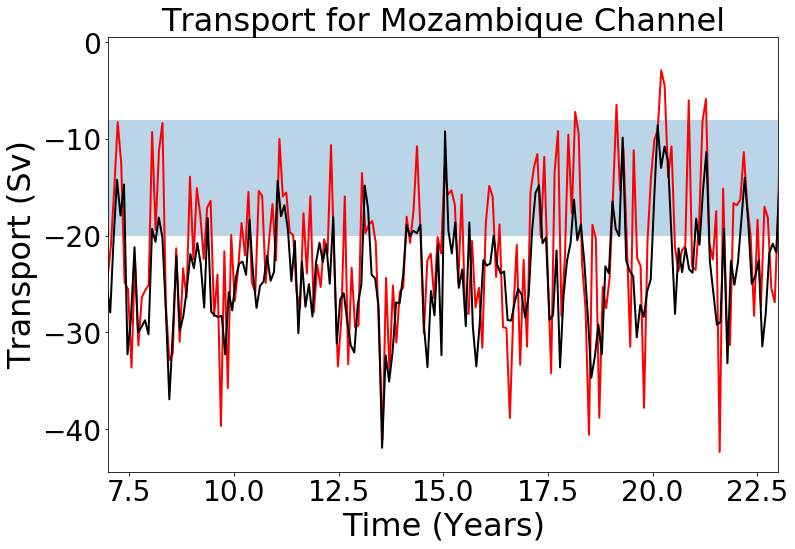

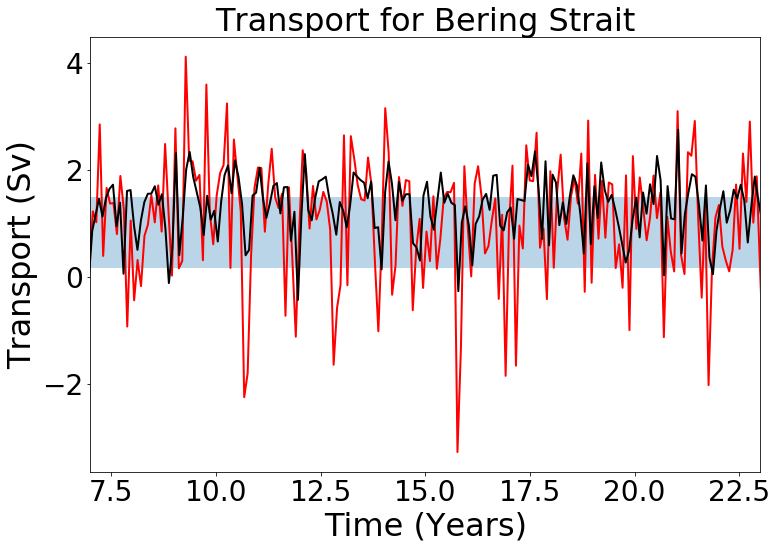

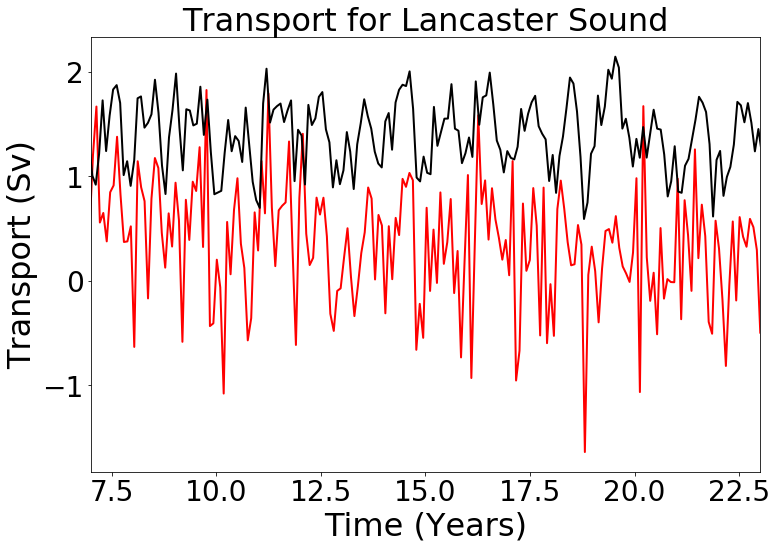

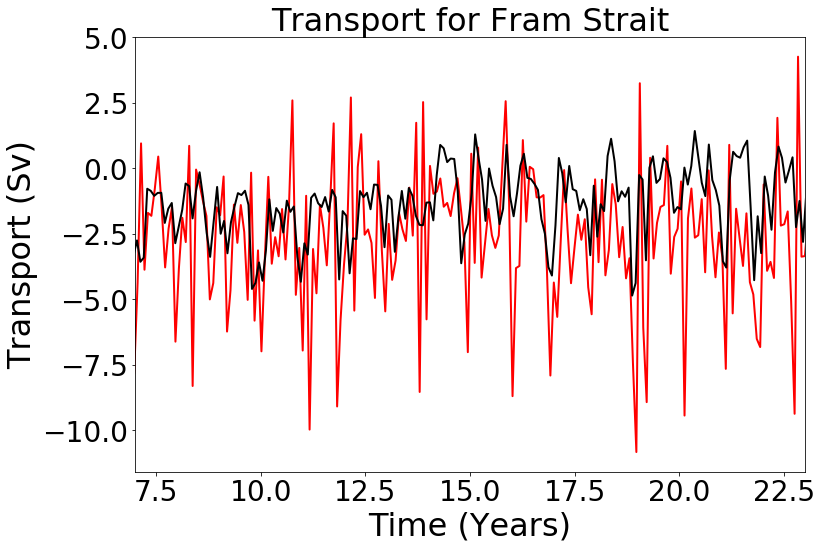

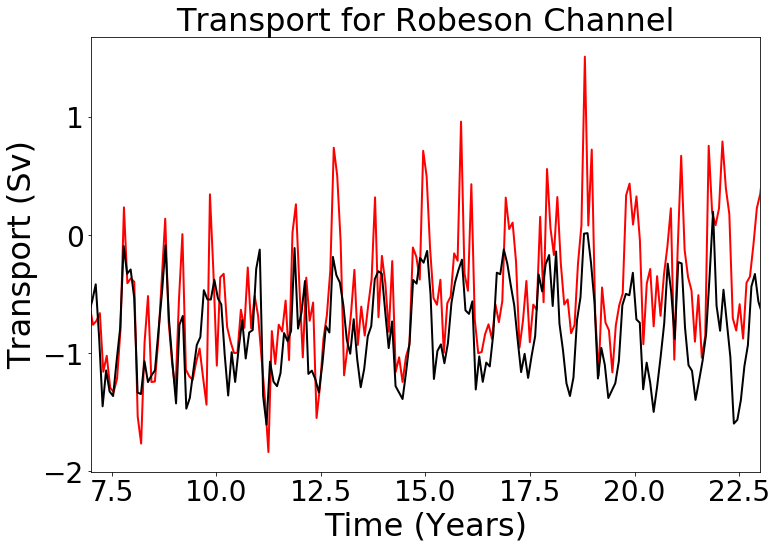

In [44]:
plt.rcParams["figure.figsize"] = (12.,8.)
i=9
for i in range(len(tranList)):
    plt.figure()
    bounds = obsDict[tranList[i]]
    title = 'Transport for '+tranList[i]
    if popLookUP[tranList[i]] is not None:
        timepop,tranpop = getPOPtransport(popLookUP[tranList[i]])
        plt.plot(timepop[::30],tranpop[::30],'r',linewidth=2)
    plt.plot(tim,tr[:,i],'k',linewidth=2)
    if bounds is not None:
        plt.gca().fill_between(tim, bounds[0]*np.ones_like(tim), bounds[1]*np.ones_like(tim), alpha=0.3, label='observations')
    plt.ylabel('Transport (Sv)',fontsize=32)
    plt.xlabel('Time (Years)',fontsize=32)
    plt.title(title,fontsize=32)
    plt.xlim(7,23)
    plt.savefig('/home/lvanroe/transport_'+labelDict[tranList[i]]+'.png')

In [48]:
0.26867075E+06/86400

3.109615162037037

In [28]:
fdir = '/lcrc/group/acme/jwolfe/acme_scratch/20180205.test-high-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-01-01.nc'

In [29]:
ds = xr.open_dataset(fdir)

In [30]:
ssrNew = ds.timeMonthly_avg_salinitySurfaceRestoringTendency.values

In [5]:
fdir = '/lcrc/group/acme/jwolfe/acme_scratch/20180205.test-high-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.rst.0001-03-01_00000.nc'

In [6]:
mesh = xr.open_dataset(fdir)

In [21]:
area = mesh.areaCell.values
lat = mesh.latCell.values
lon = mesh.lonCell.values


In [31]:
np.sum(ssrNew[0,:]*area)/area.sum()

-3.2049181370952492e-15

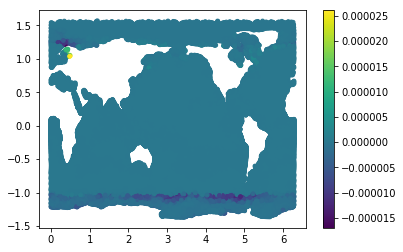

In [33]:
plt.scatter(lon,lat,s=15,c=ssrNew-ssrOld)
plt.colorbar()

In [3]:
basedir = '/lcrc/group/acme/jwolfe/acme_scratch/'
basedir2 = '/lcrc/group/acme/lvanroe/acme_scratch/'
case = '20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil'
case2 = '20180124.test-high-restoring.GMPAS-IAF.T62_oECv3.anvil'
ctrlcase = '20180208.GMPAS-IAF.T62_oRRS18v3.anvil'
fdir = basedir+case+'/run/'
fdirh = basedir+case2+'/run/'
fdirctrl = basedir2+ctrlcase+'/run/'

In [4]:
#flistmesh = sorted(glob.glob(fdir+'mpaso.hist.am.mocStreamfunctionOutput.000*'))
flistmeshH = sorted(glob.glob(fdirctrl+'mpaso.rst.000*'))
flistmeshL = sorted(glob.glob(fdir+'mpaso.rst.000*'))

In [5]:
flistmeshL

['/lcrc/group/acme/jwolfe/acme_scratch/20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.rst.0003-01-01_00000.nc',
 '/lcrc/group/acme/jwolfe/acme_scratch/20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.rst.0005-01-01_00000.nc',
 '/lcrc/group/acme/jwolfe/acme_scratch/20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.rst.0007-01-01_00000.nc',
 '/lcrc/group/acme/jwolfe/acme_scratch/20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.rst.0009-01-01_00000.nc']

In [6]:
mocMeshHR = xr.open_dataset(flistmeshH[0])
mocMeshLR = xr.open_dataset(flistmeshL[0])

In [7]:
depH=abs(mocMeshHR.refBottomDepth.values-500).argmin()
nzH = mocMeshHR.dims['nVertLevels']

depL=abs(mocMeshLR.refBottomDepth.values-500).argmin()
nzL = mocMeshLR.dims['nVertLevels']

mocMeshHR.refBottomDepth[depH].values

array(518.2042060869917)

In [9]:
fbase = 'mpaso.hist.am.timeSeriesStatsMonthly.'
start = 1
end = 12
nt = (end - start + 1)*12
moc26 = []
moc26z = np.zeros((nt,nzL))
sst = []
mocav = np.zeros((nzL,181))

moc26h = []
moc26hz = np.zeros((nt,nzL))
ssth = []
mochav = np.zeros((nzL,181))

moc26ctr = []
moc26zctr = np.zeros((nt,nzH))
sstctr = []
mocavctr = np.zeros((nzH,181))

count = 0
idx = 0
for i in range(start,end+1):
    tag = '{0:04d}'.format(i+240)
    print fdir+fbase+tag+'*nc'
    moc = xr.open_mfdataset(fdir+fbase+tag+'*nc',concat_dim='Time')
    moc3 = moc.timeMonthly_avg_mocStreamvalLatAndDepthRegion[:,0,:,:].values
    sst.append(moc.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,6,0].values)
    moc26.append(moc3[:,depL:,112].max(axis=1).mean(axis=0))
#    moc26z[:] += moc3[:,:,112].mean(axis=0)
    moc26z[idx:idx+12,:] = moc3[:,:,112]
    mocav += moc3.mean(axis=0)
    
#    moc = xr.open_mfdataset(fdirh+fbase+tag+'*nc',concat_dim='Time')
#    moc3 = moc.timeMonthly_avg_mocStreamvalLatAndDepthRegion[:,0,:,:].values
#    ssth.append(moc.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,6,0].values)
#    moc26h.append(moc3[:,ii:,112].max(axis=1).mean(axis=0))
#    moc26hz[:] += moc3[:,:,112].mean(axis=0)
#    mochav += moc3.mean(axis=0)
    
    tag = '{0:04d}'.format(i)
    print fdirctrl+fbase+tag+'*nc'
    moc = xr.open_mfdataset(fdirctrl+fbase+tag+'*nc',concat_dim='Time')
    moc3 = moc.timeMonthly_avg_mocStreamvalLatAndDepthRegion[:,0,:,:].values
    sstctr.append(moc.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,6,0].values)
    moc26ctr.append(moc3[:,depH:,112].max(axis=1).mean(axis=0))
#    moc26zctr[:] += moc3[:,:,112].mean(axis=0)
    moc26zctr[idx:idx+12,:] = moc3[:,:,112]
    mocavctr += moc3.mean(axis=0)
    
    idx+=12
    count += 1
    
moc26zctr /= count
moc26z /= count
moc26hz /= count

/lcrc/group/acme/jwolfe/acme_scratch/20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0241*nc
/lcrc/group/acme/lvanroe/acme_scratch/20180208.GMPAS-IAF.T62_oRRS18v3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001*nc
/lcrc/group/acme/jwolfe/acme_scratch/20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0242*nc
/lcrc/group/acme/lvanroe/acme_scratch/20180208.GMPAS-IAF.T62_oRRS18v3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0002*nc
/lcrc/group/acme/jwolfe/acme_scratch/20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0243*nc
/lcrc/group/acme/lvanroe/acme_scratch/20180208.GMPAS-IAF.T62_oRRS18v3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0003*nc
/lcrc/group/acme/jwolfe/acme_scratch/20180123.test-low-restoring.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0244*nc
/lcrc/group/acme/lvanroe/acme_scratch/20180208.GMPAS-IAF.T62_oRRS

In [39]:
moc26z

array([-0.47984412,  0.81424525,  1.66290748,  2.18752207,  2.35666721,
        2.36869941,  2.35549509,  2.35132388,  2.3568643 ,  2.3631755 ,
        2.37927121,  2.40160264,  2.43295532,  2.47908717,  2.54129079,
        2.61228404,  2.66482476,  2.71882741,  2.79718397,  2.89236639,
        2.9976517 ,  3.12111454,  3.26319947,  3.4213776 ,  3.60266221,
        3.80871369,  4.04084708,  4.29390963,  4.5793176 ,  4.89843777,
        5.2798254 ,  5.70424219,  6.14686443,  6.5903275 ,  7.12191971,
        7.81466364,  8.54120761,  9.08493523,  9.21007132,  9.05752777,
        8.4549661 ,  8.03959438,  7.57573714,  6.87826763,  5.92922818,
        4.927832  ,  3.76950013,  2.67777318,  1.64732497,  0.86912945,
        0.32083677, -0.03411502, -0.47236646, -0.95043799, -0.98558597,
       -1.06919563, -1.13674288, -1.15008587, -0.87471852, -0.71612724])

In [14]:
#load OBS
dsOBS = xr.open_dataset('/lcrc/group/acme/lvanroe/RAPID/moc_vertical.nc')
depOBS = dsOBS.depth.values
mocOBS = dsOBS.stream_function_mar.values
error = np.std(mocOBS,axis=1)


In [20]:
errorH = np.std(moc26zctr*count,axis=0)
errorL = np.std(moc26z*count,axis=0)

In [85]:
print np.std(moc26z*count,axis=0)

[ 0.34075393  0.77598551  1.20317261  1.51338603  1.75528465  1.94014165
  2.06364921  2.14018182  2.18454526  2.20766851  2.22186141  2.23113958
  2.24111099  2.2506582   2.25993254  2.26846334  2.27618704  2.28376555
  2.29110619  2.29830616  2.30632798  2.31448033  2.32337022  2.33389317
  2.34492516  2.35640542  2.36931311  2.38307534  2.39924622  2.41650829
  2.43590387  2.45702627  2.47750975  2.50031491  2.52107381  2.53844691
  2.55158542  2.56982331  2.58722984  2.59636901  2.59951167  2.59775195
  2.59105999  2.58341474  2.5730905   2.56212919  2.54804977  2.53383407
  2.50786705  2.47270055  2.4186717   2.33773084  2.17575863  1.97906387
  1.77498923  1.5834386   1.38039068  1.1470519   0.95003281  0.80664777]


In [9]:
dsPOP = xr.open_dataset('/lcrc/group/acme/lvanroe/presentationOS/msf+mht.ia_top_tx0.1_v2_yel_patc_1948_intel.years1948-2009.nc')

In [10]:
depPOP = dsPOP.depth_w.values
latPOP = dsPOP.lat_mht.values
mocPOP = dsPOP.TMTA.values

In [11]:
rapidSpot = abs(latPOP-26.5).argmin()

In [80]:
dsLRnoB = xr.open_dataset('/lcrc/group/acme/lvanroe/case_output/GcaseLowRestore/timeseries/mocTimeSeries.nc')
dsLRtotal = xr.open_dataset('/lcrc/group/acme/lvanroe/case_output/GcaseLowRestore/timeseries/moc_w_bolus.nc')

/lcrc/soft/climate/e3sm-unified/1.1.2_py2_nox/lib/python2.7/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/lcrc/soft/climate/e3sm-unified/1.1.2_py2_nox/lib/python2.7/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


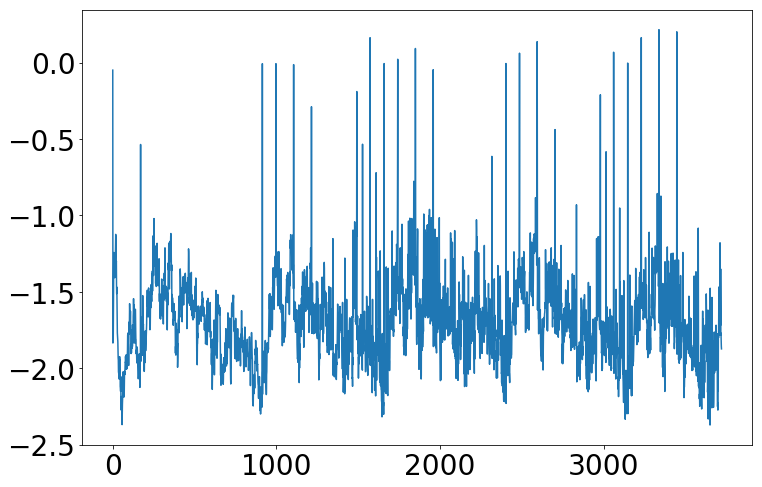

In [82]:
plt.plot(dsLRtotal.mocAtlantic26 - dsLRnoB.mocAtlantic26)

In [10]:
dsLRmean = xr.open_dataset('/lcrc/group/acme/lvanroe/case_output/GcaseLowRestore/clim/mpas/mocStreamfunction_years0240-0310.nc')

In [11]:
LRmean=dsLRmean.mocAtlantic[:60,112].values

In [21]:
errorL = [ 0.34262681,  0.7916727,   1.24184259,  1.58082788,  1.83513043,  2.01688995,
  2.1302076,   2.19555049,  2.22498714,  2.23422385,  2.23586557,  2.23691257,
  2.24004898,  2.24593392,  2.25376212,  2.26204069,  2.269625,    2.27672285,
  2.28397522,  2.29158379,  2.29896803,  2.30593393,  2.31300929,  2.32030991,
  2.32907815,  2.34009323,  2.34998042,  2.3606348,  2.37328465,  2.38823841,
  2.40190271,  2.41334579,  2.42478232,  2.43531826,  2.45075339,  2.46943641,
  2.48358508,  2.491783,  2.49836345,  2.49965372,  2.50390816,  2.5081316,
  2.50634829,  2.51818152,  2.50119915,  2.47770203,  2.46713285,  2.44236472,
  2.41070539,  2.36372993,  2.2995293,  2.22760392,  2.08788292,  1.90309633,
  1.71498396,  1.49452067,  1.30460071,  1.10893145,  0.94112963,  0.83825651]

In [94]:
len(errorL)

61

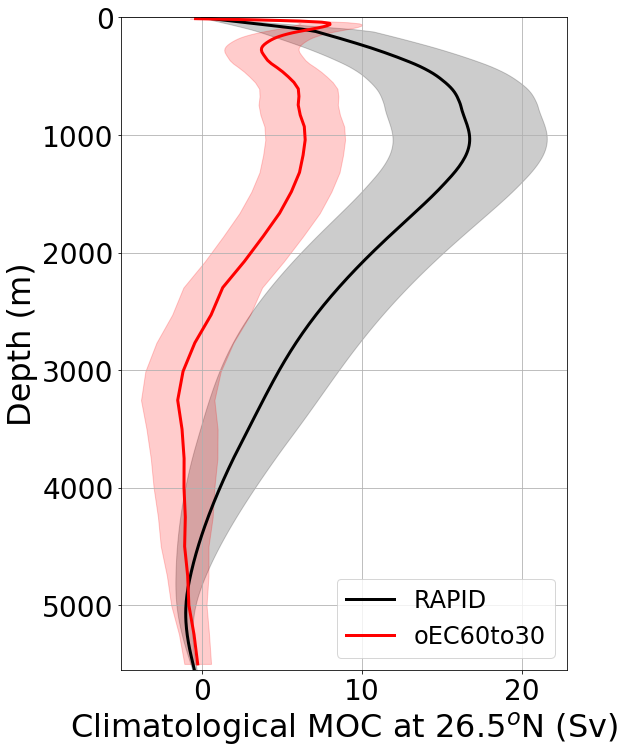

In [26]:
plt.rcParams["figure.figsize"] = (8.,12.)
mocMean = mocOBS.mean(axis=1)
fig,ax = plt.subplots()
labels = np.arange(-5700,0,1000)
ax.fill_betweenx(-depOBS,mocMean-error,mocMean+error,color='k',alpha=0.2)
ax.plot(mocMean,-depOBS,'k',linewidth=3)
ax.plot(LRmean,-mocMeshLR.refBottomDepth,'r',linewidth=3)
ax.fill_betweenx(-mocMeshLR.refBottomDepth,LRmean-errorL,LRmean+errorL\
                 ,color='r',alpha=0.2)

#ax.plot(moc26hz,-mocMesh.refBottomDepth,'g',linewidth=3)
#ax.plot(moc26zctr.mean(axis=0)*count,-mocMeshHR.refBottomDepth,'b',linewidth=3)
#ax.fill_betweenx(-mocMeshHR.refBottomDepth,moc26zctr.mean(axis=0)*count-errorH,moc26zctr.mean(axis=0)*count+errorH,color='b',alpha=0.2)
#ax.plot(mocPF,-depPOP,'r',linewidth=3)
ax.set_ylim(-5550,0)
ax.set_yticklabels(np.arange(6000,-1,-1000))
ax.set_xlabel(r'Climatological MOC at 26.5$^o$N (Sv)',fontsize=32)
ax.set_ylabel('Depth (m)',fontsize=32)
ax.grid(True)
ax.legend(['RAPID','oEC60to30'],loc='lower right',fontsize=24)
fig.savefig('mocvsMPAS_lowRes_tall.pdf',bbox_inches='tight', pad_inches=0)

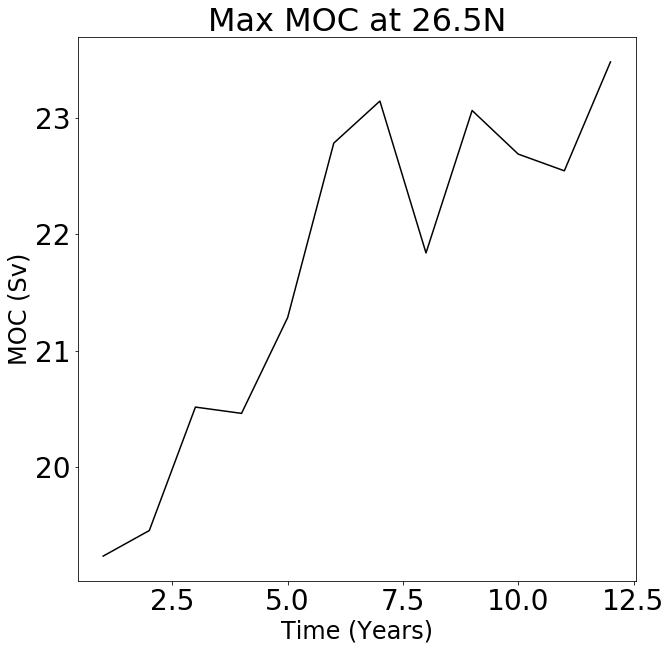

In [66]:
plt.rcParams["figure.figsize"] = (10.,10.)
time=(np.arange(start,end+1,1.))
plt.plot(time,np.asarray(moc26ctr).flatten(),'k')
#plt.plot(time,np.asarray(moc26).flatten(),'b')
#plt.plot(time,np.asarray(moc26h).flatten(),'g')

plt.xlabel('Time (Years)',fontsize=24)
plt.ylabel('MOC (Sv)',fontsize=24)
plt.title('Max MOC at 26.5N',fontsize=32)
#plt.savefig('/home/lvanroe/moctimeseries_lowrestore.png',bbox_inches='tight', pad_inches=0)

In [32]:
moc.binBoundaryMocStreamfunction.shape

(12, 181)

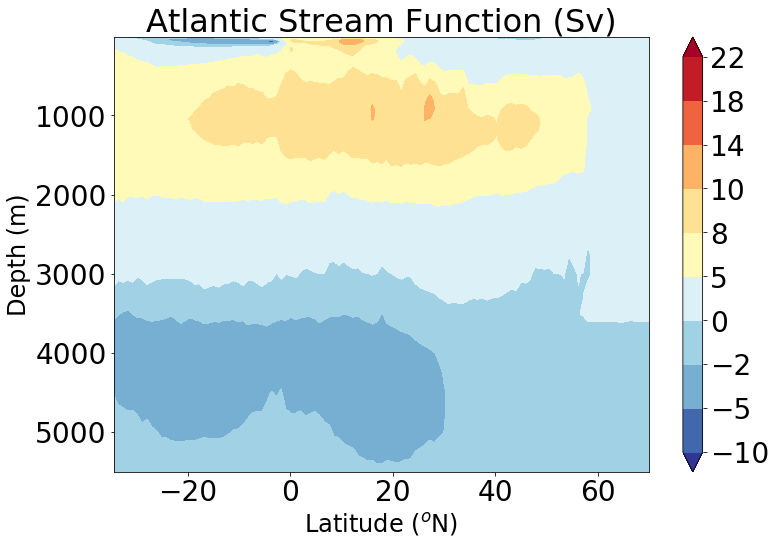

In [34]:
plt.rcParams["figure.figsize"] = (12.,8.)

fig,ax = plt.subplots()
labels = np.arange(-5700,0,1000)
ps = ax.contourf(moc.binBoundaryMocStreamfunction[0,:]*180/np.pi,-mocMesh.refBottomDepth,mocavctr[:,:]/count, \
                        levels=[-10, -5, -2, 0, 5, 8, 10, 14, 18, 22],extend='both',cmap='RdYlBu_r')

tickbounds = [-10, -5, -2, 0, 5, 8, 10, 14, 18, 22]
levbounds = [-10, -5, -2, 0, 5, 8, 10, 14, 18, 22]
fig.colorbar(ps)

ax.set_xlim(-34.5,70.1)
ax.set_xlabel(r'Latitude ($^o$N)',fontsize=24)
ax.set_ylabel('Depth (m)',fontsize=24)
ax.set_title('Atlantic Stream Function (Sv)',fontsize=32)
ax.set_yticklabels(range(6000,0,-1000))
#fig.savefig('/home/lvanroe/mocMPAS.png')

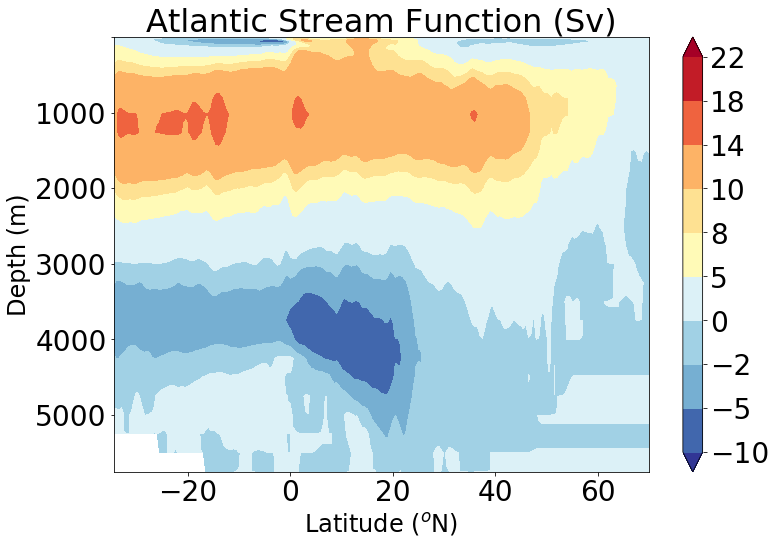

In [13]:
plt.rcParams["figure.figsize"] = (12.,8.)

fig,ax = plt.subplots()
labels = np.arange(-5700,0,1000)
ps = ax.contourf(latPOP,-depPOP,mocPOP[7:27,:,:].mean(axis=0), \
                        levels=[-10, -5, -2, 0, 5, 8, 10, 14, 18, 22],extend='both',cmap='RdYlBu_r')

tickbounds = [-10, -5, -2, 0, 5, 8, 10, 14, 18, 22]
levbounds = [-10, -5, -2, 0, 5, 8, 10, 14, 18, 22]
fig.colorbar(ps)

ax.set_xlim(-34.5,70.1)
ax.set_xlabel(r'Latitude ($^o$N)',fontsize=24)
ax.set_ylabel('Depth (m)',fontsize=24)
ax.set_title('Atlantic Stream Function (Sv)',fontsize=32)
ax.set_yticklabels(range(6000,0,-1000))
#fig.savefig('/home/lvanroe/mocPOP.png')

In [37]:
mhtP = dsPOP.MHTG[7:25,:].mean(axis=0).values

In [15]:
ds2 = xr.open_dataset('/lcrc/group/acme/lvanroe/case_output/20171021.tune.GMPAS-IAF.T62_oRRS18v3_yr1020/clim/mpas/meridionalHeatTransport_years0010-0020.nc')

In [20]:
mhtM = ds2.timeMonthly_avg_meridionalHeatTransportLat.values

In [26]:
dsO = xr.open_dataset('/lcrc/group/acme/mpas_analysis/observations/Ocean/MHT/mht_TrenberthCaron.NoAtm.nc')

In [30]:
lat = dsO.LATITUDE.values
obs = dsO.GLOBALNCEP_ADJUSTED.values
err = dsO.GLOBALNCEP_ERR.values

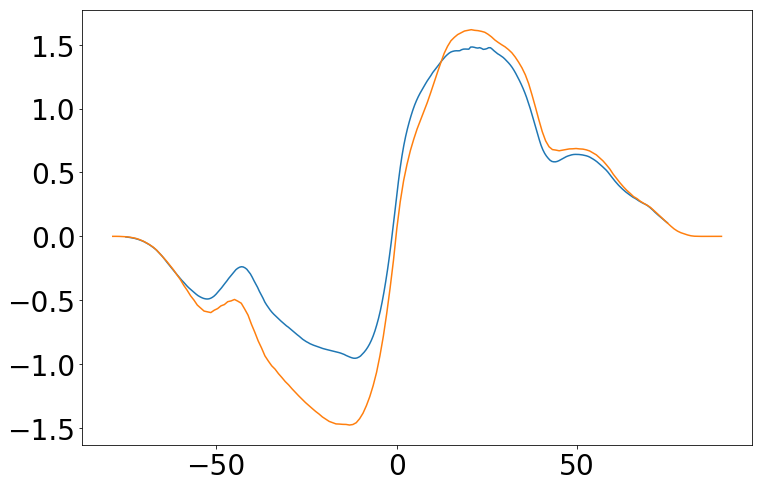

In [25]:
plt.plot(dsPOP.lat_mht.values,mhtP)
plt.plot(ds2.binBoundaryMerHeatTrans,mhtM)

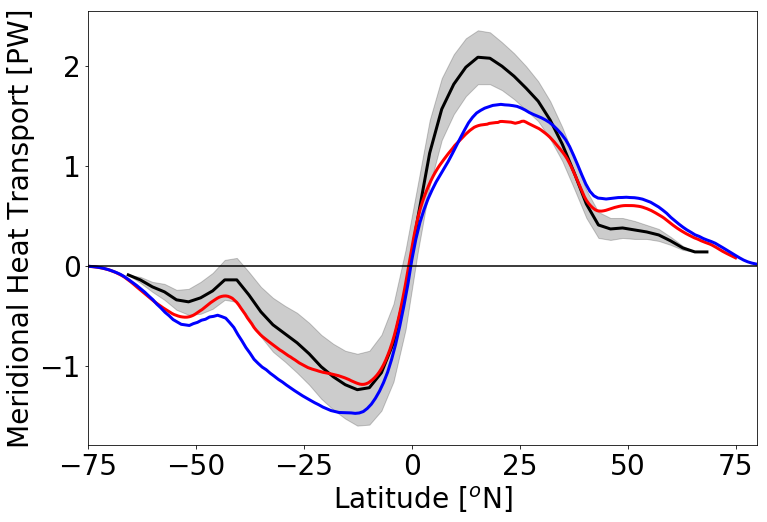

In [44]:
fig,ax = plt.subplots()
ax.plot(lat,obs,'k',linewidth=3)
ax.fill_between(lat,obs-err,obs+err,color='k',alpha=0.2)
ax.plot(dsPOP.lat_mht.values,mhtP,'r',linewidth=3)
ax.plot(ds2.binBoundaryMerHeatTrans,mhtM,'b',linewidth=3)
ax.set_ylabel('Meridional Heat Transport [PW]',fontsize=28)
ax.set_xlabel(r'Latitude [$^o$N]',fontsize=28)
ax.plot(np.linspace(-75,80,3),np.zeros(3),'k')
ax.set_xlim(-75,80)
#fig.savefig('/home/lvanroe/mht_pop_mpas.png')

In [ ]:
ax.fill_between